In [231]:
import math
import math
import operator
import sys
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,recall_score,precision_score,r2_score,mean_absolute_error,mean_squared_error
from sklearn.tree import DecisionTreeClassifier
eps = np.finfo(float).eps
from sklearn import linear_model
import copy

In [232]:
#Assigning column names to data
df=pd.read_csv('data.csv')
df=df.drop('Serial No.',axis=1)

In [233]:
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

In [234]:
# train_X=train[:,:-1]
train_X=train.drop('Chance of Admit ',axis=1)
train_X=(train_X-train_X.mean())/train_X.std()
train_X.insert(0, 'x0', np.ones(len(train)))
train_Y=train['Chance of Admit ']
m=train_X.shape[0]
train_Y=train_Y.values.reshape(m,1)
train_X=train_X.values

In [235]:
theta = np.zeros([8,1])
alpha = 0.01
iters = 1000

In [236]:
def G(x):
    p=1+(np.exp(-x))
    return 1/p

In [237]:
def gradient_descent(X, y, theta, alpha, num_iters):
    for i in range(0,num_iters):
        gradient = G(np.matmul(X, theta))- y   
        theta = theta - (alpha/len(X))*np.sum(np.matmul(gradient.T,X))
    return theta

In [238]:
def predict(theta,test_X,threshold):
    pred=[]
    for row in range(len(test_X)):
        ans=0
        for i in range(len(test_X.columns)):
            ans+=theta[i]*test_X.iloc[row,i]
        ans=G(ans)
        if ans > threshold :
            pred.append(1)
        else:
            pred.append(0)
    return pred

In [239]:
test_X=test.drop('Chance of Admit ',axis=1)
test_Y=test['Chance of Admit ']
test_Y=test_Y.values.reshape(test_X.shape[0],1)
test_X=(test_X-test_X.mean())/test_X.std()
test_X.insert(0, 'x0', np.ones(len(test_X)))

In [240]:
threshold = 0.45
precesion = []
recall = []
while threshold <= 1:
    X = copy.deepcopy(train_X)
    Y = copy.deepcopy(train_Y)
    for i in range(len(Y)):
        if float(Y[i])>threshold:
            Y[i]=1
        else:
            Y[i]=0
#     print Y
    Yt = copy.deepcopy(test_Y)
#     print Yt
    for i in range(len(Yt)):
        if float(Yt[i])>threshold:
            Yt[i]=1
        else:
            Yt[i]=0
#     print Yt
    theta = np.zeros([8,1])
    g = gradient_descent(X, Y, theta, alpha, iters)
    theta=g
    pred=predict(theta,test_X,threshold)
    threshold = threshold + 0.05
    score = precision_score(Yt,pred)
    precesion.append(score)
    print(score)
    print threshold
    score = recall_score(Yt,pred)
    recall.append(score)

1.0
0.5
1.0
0.55
0.9772727272727273
0.6
0.9767441860465116
0.65
0.9767441860465116
0.7
0.9090909090909091
0.75
0.8809523809523809
0.8
0.9285714285714286
0.85
1.0
0.9
0.0
0.95
0.0
1.0


/home/vagupta/anaconda2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


Text(0.5,1,'Threshold vs Precision vs Recall')

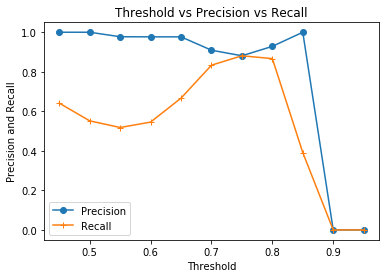

In [244]:
fig, ax = plt.subplots()
x_axis = []
threshold = 0.45
while thres <= 1:
    x_axis.append(thres)
    thres = thres + 0.05
ax.plot(x_axis, precesion,label="Precision",marker='o')
ax.plot(x_axis, recall,label="Recall",marker='+')
ax.legend(loc=0)
ax.set_xlabel("Threshold")
ax.set_ylabel("Precision and Recall")
ax.set_title('Threshold vs Precision vs Recall')